###  K_nearest Neighbors Modelling

### Import relevant libaries and preprocessed dataset

In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import ensemble
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [43]:
df = pd.read_csv('weatherAUS_imputed.csv')
df.head()

,Date,Location,Year,Month,RainToday,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindGustDir_angle,Latitude,Longitude,Cloud,Pressure,Temperature,Humidity,temp_fluctuation
0,2009-01-01,Cobar,2009,1,0.0,0.0,-0.254034,1.452543,1.231645,0.544048,0.367568,-0.016581,0.134517,-0.346762,-1.566909,1.483789,-2.239319,1.266185
1,2009-01-02,Cobar,2009,1,0.0,0.0,-0.254034,2.092290,1.417426,-0.274399,0.142577,-0.016581,0.134517,-1.337620,-0.534263,0.523016,-2.103988,-0.123978
2,2009-01-03,Cobar,2009,1,0.0,0.0,-0.254034,1.589632,1.497046,-0.795229,-0.307405,-0.016581,0.134517,-1.337620,-0.664246,1.892307,-2.753579,1.531952
3,2009-01-04,Cobar,2009,1,0.0,0.0,-0.254034,1.178365,0.780464,0.395239,-1.432358,-0.016581,0.134517,-0.346762,-0.787008,1.756134,-1.400263,1.450178
4,2009-01-05,Cobar,2009,1,0.0,0.0,-0.254034,1.315454,1.205105,-0.720824,1.267530,-0.016581,0.134517,-0.544934,-0.765344,1.839351,-1.535595,1.102637


### K_nearest neighbors

#### 1. Without over or undersampling 

In [44]:
data = df.drop(columns=['RainTomorrow', 'RainToday', 'Location', 'Date'])
target = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

**Minowski**

In [45]:
from sklearn import neighbors, datasets, model_selection
knn = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier()

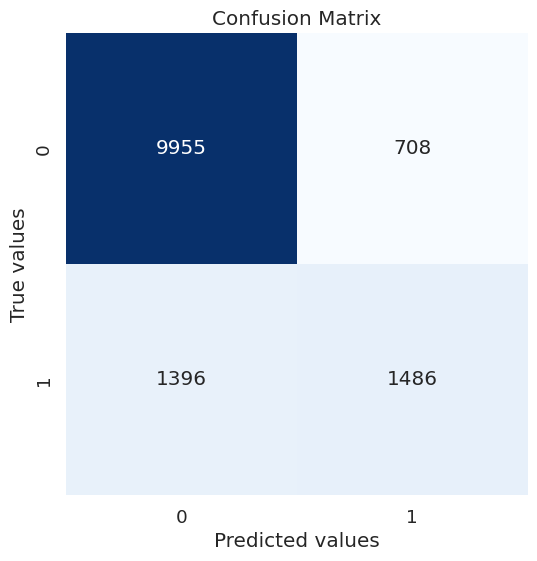

-------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10663
         1.0       0.68      0.52      0.59      2882

    accuracy                           0.84     13545
   macro avg       0.78      0.72      0.74     13545
weighted avg       0.83      0.84      0.84     13545

-------------------------
Model Accuracy Train Set: 0.889 Model Accuracy Test Set: 0.845


In [46]:
y_pred_mi = knn.predict(X_test)
y_train_pred_mi = knn.predict(X_train)
conf_matrix = confusion_matrix(y_test, y_pred_mi)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()


# Generate classification report
report = classification_report(y_test, y_pred_mi)

# Print the classification report
print('-------------------------')
print(report)

# Calculate accuracy for both sets
print('-------------------------')
train_accuracy = accuracy_score(y_train, y_train_pred_mi)
test_accuracy = accuracy_score(y_test, y_pred_mi)
print("Model Accuracy Train Set:", np.round(train_accuracy,3), "Model Accuracy Test Set:", np.round(test_accuracy,3))

**Manhattan** 

In [13]:
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_m.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

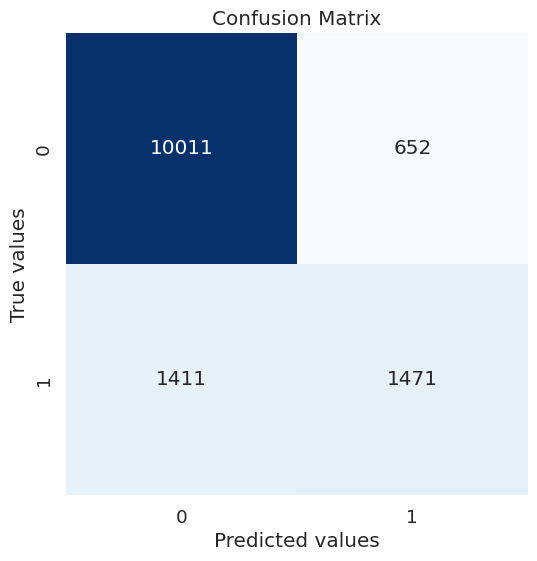

-------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     10663
         1.0       0.69      0.51      0.59      2882

    accuracy                           0.85     13545
   macro avg       0.78      0.72      0.75     13545
weighted avg       0.84      0.85      0.84     13545

-------------------------
Model Accuracy Train Set: 0.891 Model Accuracy Test Set: 0.848


In [14]:
y_pred_ma = knn_m.predict(X_test)
y_train_pred_ma = knn_m.predict(X_train)
conf_matrix = confusion_matrix(y_test, y_pred_ma)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()


# Generate classification report
report = classification_report(y_test, y_pred_ma)

# Print the classification report
print('-------------------------')
print(report)

# Calculate accuracy for both sets
print('-------------------------')
train_accuracy = accuracy_score(y_train, y_train_pred_ma)
test_accuracy = accuracy_score(y_test, y_pred_ma)
print("Model Accuracy Train Set:", np.round(train_accuracy,3), "Model Accuracy Test Set:", np.round(test_accuracy,3))

**Chebyshev**

In [15]:
knn_c = neighbors.KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn_c.fit(X_train,y_train)

KNeighborsClassifier(metric='chebyshev')

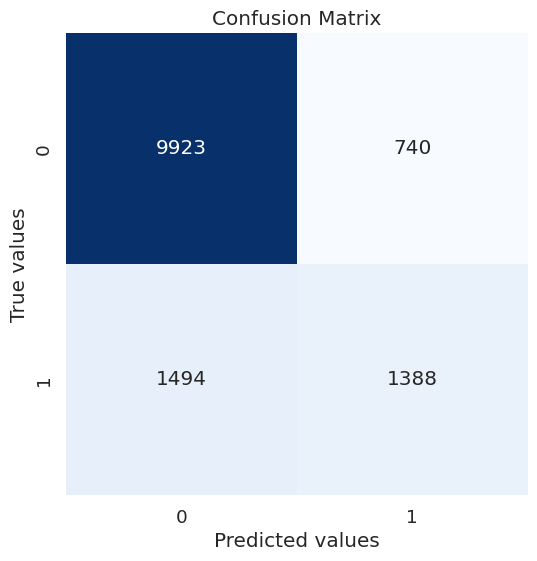

-------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10663
         1.0       0.65      0.48      0.55      2882

    accuracy                           0.84     13545
   macro avg       0.76      0.71      0.73     13545
weighted avg       0.82      0.84      0.83     13545

-------------------------
Model Accuracy Train Set: 0.885 Model Accuracy Test Set: 0.835


In [18]:
y_pred_c = knn_c.predict(X_test)
y_train_pred_c = knn_c.predict(X_train)
conf_matrix = confusion_matrix(y_test, y_pred_c)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()


# Generate classification report
report = classification_report(y_test, y_pred_c)

# Print the classification report
print('-------------------------')
print(report)

# Calculate accuracy for both sets
print('-------------------------')
train_accuracy = accuracy_score(y_train, y_train_pred_c)
test_accuracy = accuracy_score(y_test, y_pred_c)
print("Model Accuracy Train Set:", np.round(train_accuracy,3), "Model Accuracy Test Set:", np.round(test_accuracy,3))

**Score Manhattan, Score Minkowski, Score Chebyshev**

In [17]:
#Score of the model using the Minkowski distance
score_minkowski = knn.score(X_test, y_test)

#Score of the model using the Manhattan distance
score_manhattan = knn_m.score(X_test, y_test)

#Score of the model using the Chebyshev distance
score_chebyshev = knn_c.score(X_test, y_test)

score_minkowski, score_manhattan, score_chebyshev

(0.8446659283868586, 0.8476928755998523, 0.8350682908822443)

In [28]:
score_minko = [] 
score_man = []
score_cheb = []
k = range(1,41)
def knn_score(i,type): 
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, metric=type)
    knn.fit(X_train,y_train)
    return knn.score(X_test, y_test)
    
for i in k: 
    score_minko.append(knn_score(i,'minkowski'))
    score_man.append(knn_score(i,'manhattan'))
    score_cheb.append(knn_score(i,'chebyshev'))

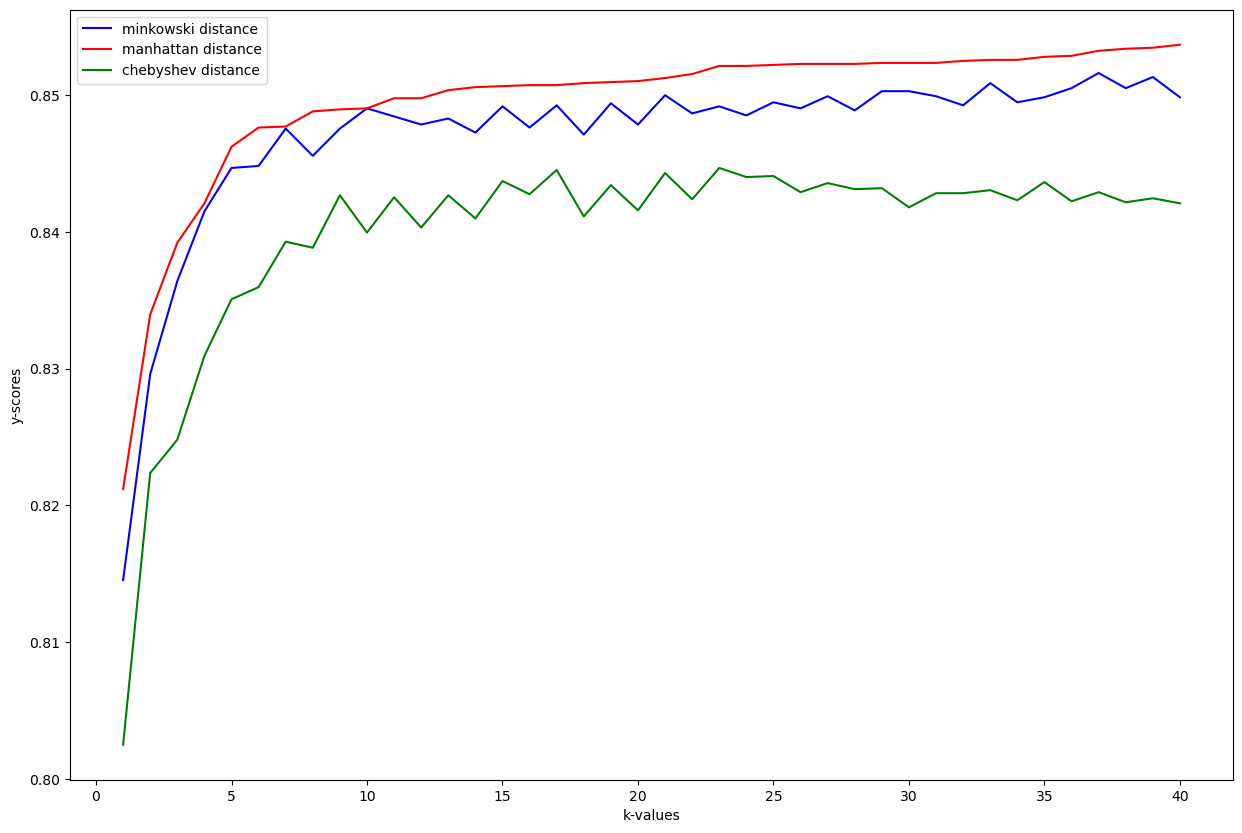

In [53]:
plt.figure(figsize=(15,10))
plt.plot(k,score_minko, color="blue", label="minkowski distance")
plt.plot(k,score_man, color="red", label="manhattan distance")
plt.plot(k,score_cheb, color="green", label="chebyshev distance")
plt.xlabel("k-values")
plt.ylabel("y-scores")
plt.legend()

In [63]:
max(score_man)

0.8536729420450351

Looks like Manhattan is the best distance to use. It peaks around 40 K neighbors.
Let's stick with the Manhattan model and see if the result changes when over oder undersampling the data

### 2. With over sampling 

In [47]:
df = pd.read_csv('weatherAUS_imputed.csv')
df.head()
data = df.drop(columns=['RainTomorrow', 'RainToday', 'Location', 'Date'])
target = df['RainTomorrow']

### 2.1 RandomOverSampling

In [48]:
ros = RandomOverSampler()
sample_ros = ros.fit_resample(data,target)

In [49]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(sample_ros[0], sample_ros[1], test_size=0.2, random_state=20)

In [53]:
k = range(1,41)
def knn_score_manhattan(i,X_tr, y_tr, X_te, y_te): 
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(X_tr,y_tr)
    return knn.score(X_te, y_te)

In [54]:
score_man_ros = []
for i in k: 
    score_man_ros.append(knn_score_manhattan(i,X_train_ros, y_train_ros, X_test_ros, y_test_ros))

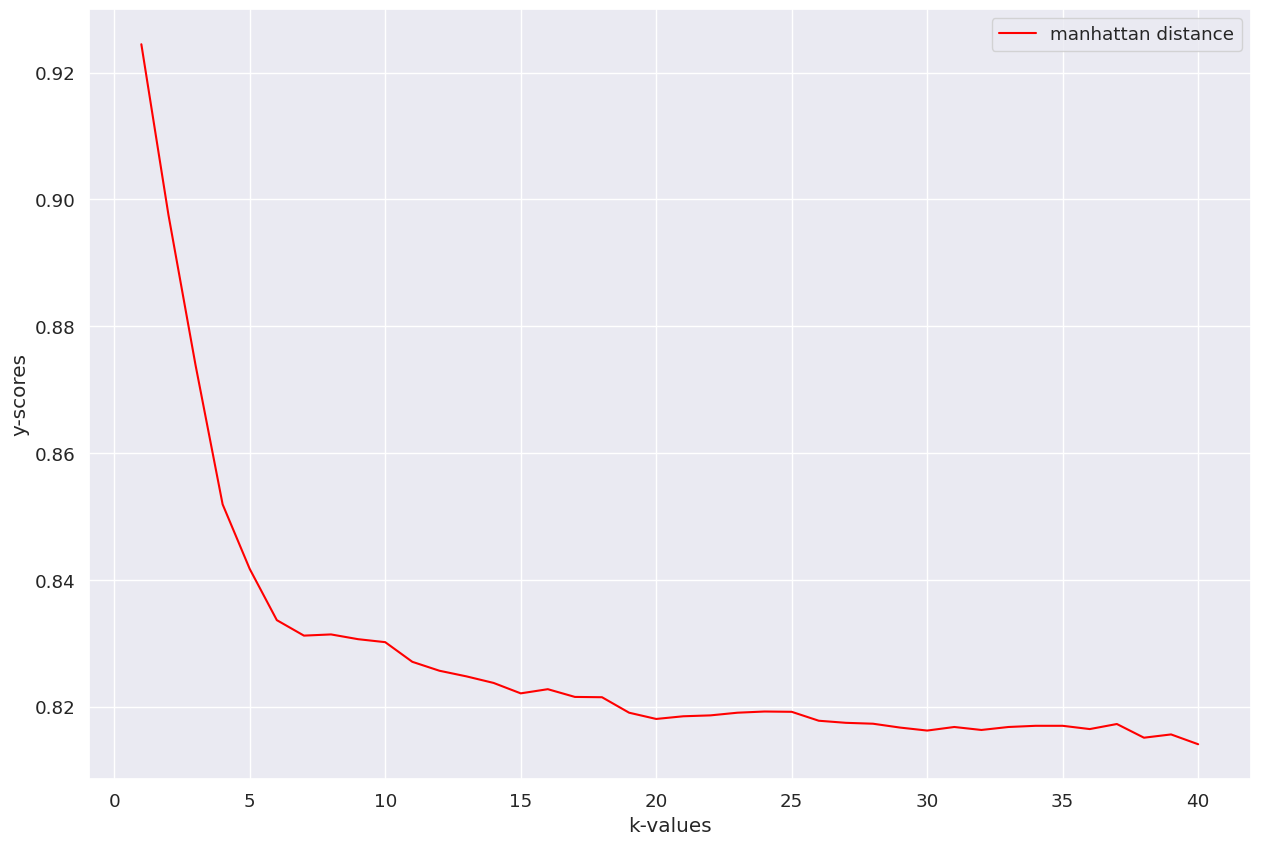

In [55]:
plt.figure(figsize=(15,10))
plt.plot(k,score_man_ros, color="red", label="manhattan distance")
plt.xlabel("k-values")
plt.ylabel("y-scores")
plt.legend()

In [57]:
max_score_ros = max(score_man_ros)
print("The maximum accuracy score is:", max_score_ros)
print("We get the maximum accuracy score for:", score_man_ros.index(max_score_ros) + 1, "n_neighbors")

The maximum accuracy score is: 0.9244742771310552
We get the maximum accuracy score for: 1 n_neighbors


In [58]:
knn_ros = neighbors.KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_ros.fit(X_train_ros,y_train_ros)
y_pred_ros = knn_ros.predict(X_test_ros)
y_train_pred_ros = knn_ros.predict(X_train_ros)

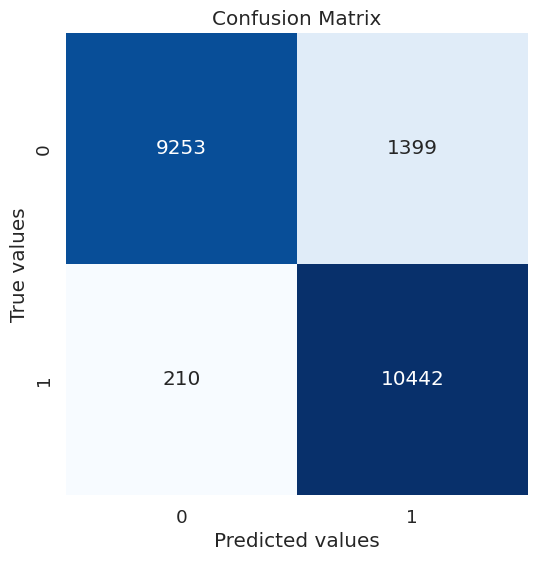

-------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92     10652
         1.0       0.88      0.98      0.93     10652

    accuracy                           0.92     21304
   macro avg       0.93      0.92      0.92     21304
weighted avg       0.93      0.92      0.92     21304

-------------------------
Model Accuracy Train Set: 1.0 Model Accuracy Test Set: 0.924


In [61]:
#calculate confusion matrix
conf_matrix = confusion_matrix(y_test_ros, y_pred_ros)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()


# Generate classification report
report = classification_report(y_test_ros, y_pred_ros)

# Print the classification report
print('-------------------------')
print(report)

# Calculate accuracy for both sets
print('-------------------------')
train_accuracy = accuracy_score(y_train_ros, y_train_pred_ros)
test_accuracy = accuracy_score(y_test_ros, y_pred_ros)
print("Model Accuracy Train Set:", np.round(train_accuracy,3), "Model Accuracy Test Set:", np.round(test_accuracy,3))

### 2.2 SMOTE

In [62]:
smo = SMOTE()
sample_sm = smo.fit_resample(data,target)

In [63]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(sample_sm[0], sample_sm[1], test_size=0.2, random_state=20)

**Manhattan** 

In [64]:
score_man_sm = []
for i in k: 
    score_man_sm.append(knn_score_manhattan(i,X_train_sm, y_train_sm, X_test_sm, y_test_sm))

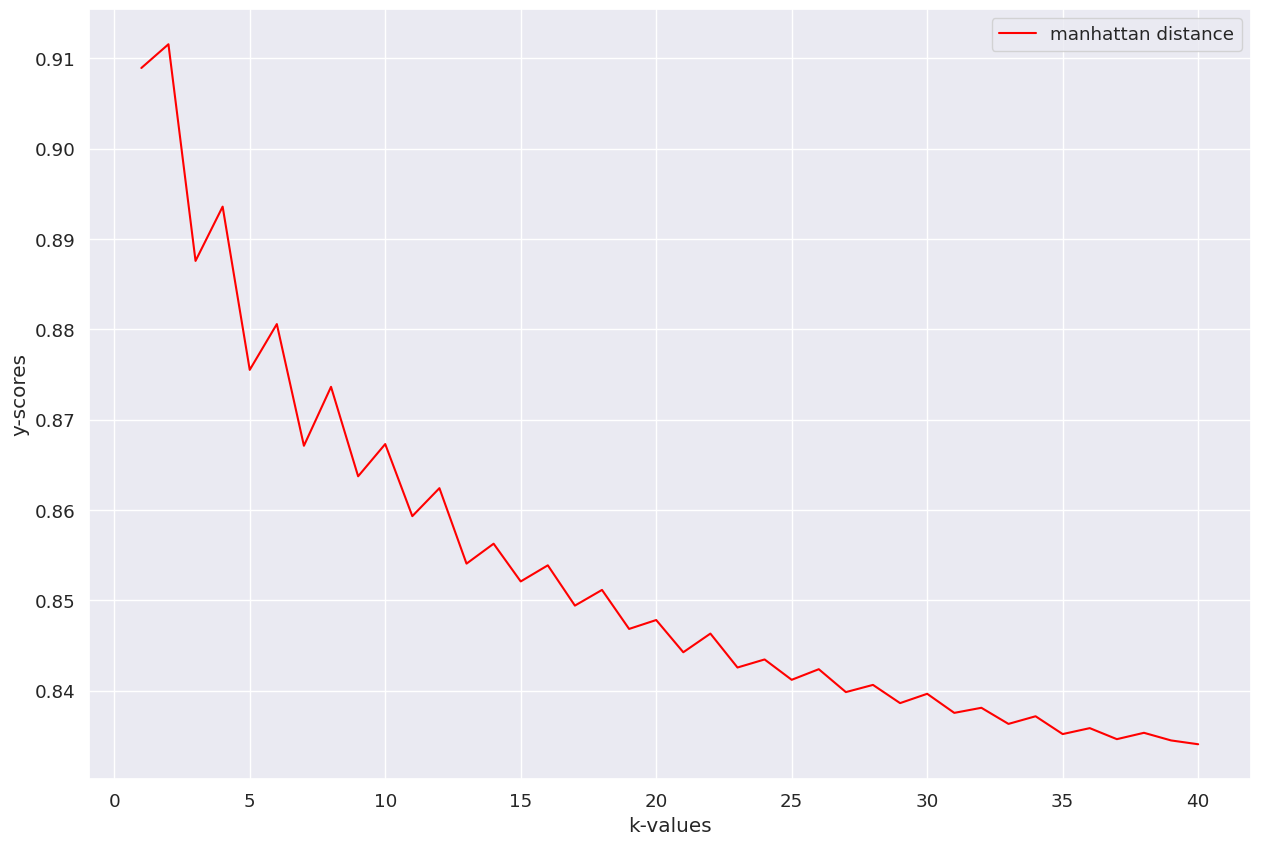

In [65]:
plt.figure(figsize=(15,10))
plt.plot(k,score_man_sm, color="red", label="manhattan distance")
plt.xlabel("k-values")
plt.ylabel("y-scores")
plt.legend()

In [66]:
max_score_sm = max(score_man_sm)
print("The maximum accuracy score is:", max_score_sm)
print("We get the maximum accuracy score for:", score_man_sm.index(max_score_sm) + 1, "n_neighbors")

The maximum accuracy score is: 0.9115659031167855
We get the maximum accuracy score for: 2 n_neighbors


In [67]:
knn_sm = neighbors.KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn_sm.fit(X_train_sm,y_train_sm)
y_pred_sm = knn_sm.predict(X_test_sm)
y_train_pred_sm = knn_sm.predict(X_train_sm)

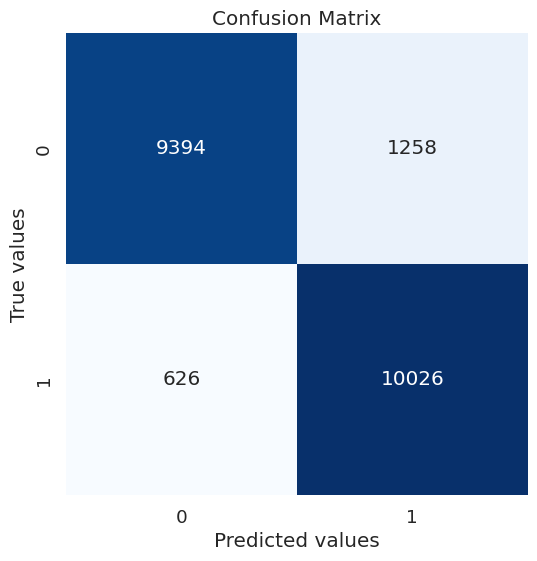

-------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     10652
         1.0       0.89      0.94      0.91     10652

    accuracy                           0.91     21304
   macro avg       0.91      0.91      0.91     21304
weighted avg       0.91      0.91      0.91     21304

-------------------------
Model Accuracy Train Set: 0.991 Model Accuracy Test Set: 0.912


In [68]:
#calculate confusion matrix
conf_matrix = confusion_matrix(y_test_sm, y_pred_sm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()


# Generate classification report
report = classification_report(y_test_sm, y_pred_sm)

# Print the classification report
print('-------------------------')
print(report)

# Calculate accuracy for both sets
print('-------------------------')
train_accuracy = accuracy_score(y_train_sm, y_train_pred_sm)
test_accuracy = accuracy_score(y_test_sm, y_pred_sm)
print("Model Accuracy Train Set:", np.round(train_accuracy,3), "Model Accuracy Test Set:", np.round(test_accuracy,3))

### 3. With undersampling 

### 3.1 RandomUnderSampler

In [69]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
sample_rus = rus.fit_resample(data,target)

In [70]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(sample_rus[0], sample_rus[1], test_size=0.2, random_state=20)

In [72]:
score_man_rus = []
for i in k: 
    score_man_rus.append(knn_score_manhattan(i,X_train_rus, y_train_rus, X_test_rus, y_test_rus))

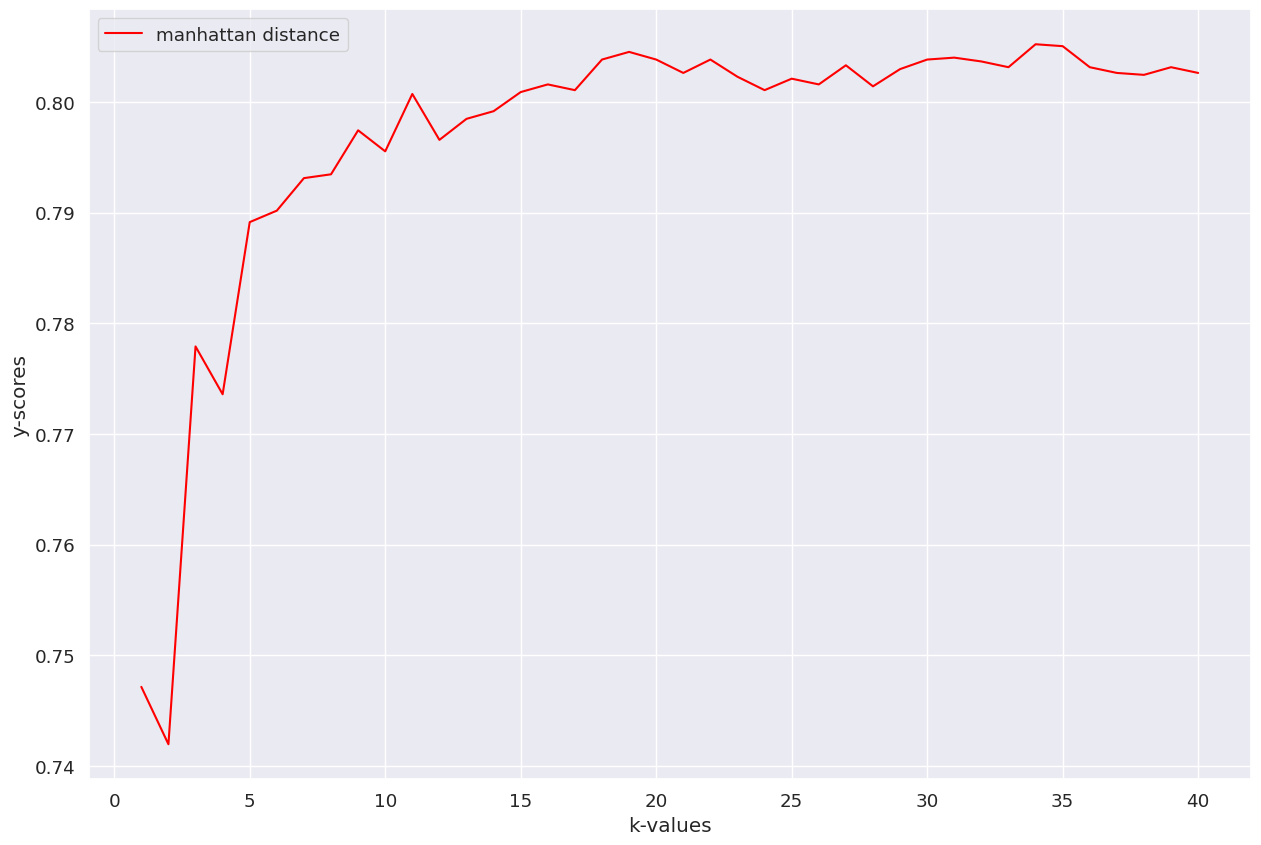

In [73]:
plt.figure(figsize=(15,10))
plt.plot(k,score_man_rus, color="red", label="manhattan distance")
plt.xlabel("k-values")
plt.ylabel("y-scores")
plt.legend()

In [74]:
max_score_rus = max(score_man_rus)
print("The maximum score is:", max_score_rus)
print("We get the maximum score for:", score_man_rus.index(max_score_rus) + 1, "n_neighbors")

The maximum score is: 0.8052194953335637
We get the maximum score for: 34 n_neighbors


In [75]:
knn_rus = neighbors.KNeighborsClassifier(n_neighbors=26, metric='manhattan')
knn_rus.fit(X_train_rus,y_train_rus)
print(knn_rus.score(X_test_rus, y_test_rus)) 
y_pred_rus = knn_rus.predict(X_test_rus)
y_train_pred_rus = knn_rus.predict(X_train_rus)

0.8015900449360526


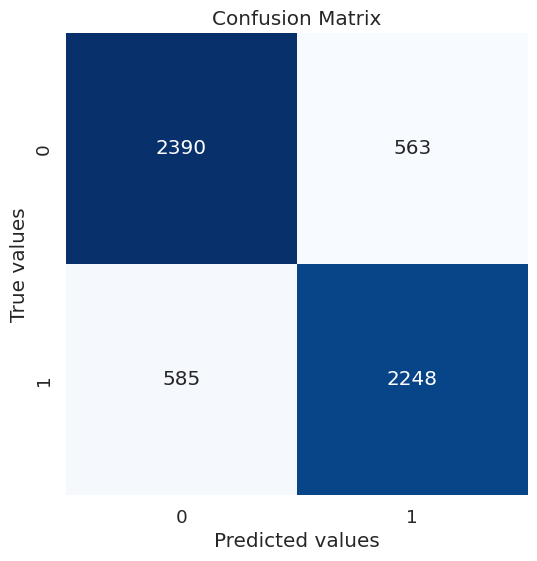

-------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      2953
         1.0       0.80      0.79      0.80      2833

    accuracy                           0.80      5786
   macro avg       0.80      0.80      0.80      5786
weighted avg       0.80      0.80      0.80      5786

-------------------------
Model Accuracy Train Set: 0.817 Model Accuracy Test Set: 0.802


In [79]:
#calculate confusion matrix
conf_matrix = confusion_matrix(y_test_rus, y_pred_rus)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()


# Generate classification report
report = classification_report(y_test_rus, y_pred_rus)

# Print the classification report
print('-------------------------')
print(report)

# Calculate accuracy for both sets
print('-------------------------')
train_accuracy = accuracy_score(y_train_rus, y_train_pred_rus)
test_accuracy = accuracy_score(y_test_rus, y_pred_rus)
print("Model Accuracy Train Set:", np.round(train_accuracy,3), "Model Accuracy Test Set:", np.round(test_accuracy,3))

### 4. Conclusion 

We get the best performance with random oversampling. 


Precision: It measures the accuracy of positive predictions. In this context, for class 0.0, the precision is 0.98, which means that when the model predicts an instance as belonging to class 0.0, it is correct 98% of the time. For class 1.0, the precision is 0.88, meaning the model is correct 88% of the time when predicting class 1.0.

Recall: It measures the ability of the model to capture all positive instances. For class 0.0, the recall is 0.87, indicating that the model correctly identifies 87% of all actual instances of class 0.0. For class 1.0, the recall is 0.98, indicating that the model captures 98% of all actual instances of class 1.0.

F1-score: It is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-score implies both high precision and high recall. In this case, for class 0.0, the F1-score is 0.92, and for class 1.0, it is 0.93.

Support: It indicates the number of actual occurrences of the class in the specified dataset. For class 0.0, there are 10,652 instances, and for class 1.0, there are also 10,652 instances.

Accuracy: It represents the proportion of correctly classified instances out of all instances. Here, the overall accuracy is 0.92, meaning the model correctly predicts the class for 92% of all instances.

Macro Avg: It calculates the average of the precision, recall, and F1-score across both classes, without considering class imbalance.

Weighted Avg: It calculates the average of the precision, recall, and F1-score, weighted by the number of instances in each class. This gives more weight to classes with more instances, which is useful when dealing with class imbalance.

Overall, the model seems to perform well, with high precision, recall, and F1-score for both classes and a good overall accuracy.